# Import data and libraries

In [102]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
data_df = pd.read_csv('house-prices.csv')
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


# Data cleaning

Dropping the Features 'Order' and 'PID'

In [104]:
data_df.drop(['Order', 'PID'], axis=1, inplace = True)

Filling factor

In [105]:
def filling_factor(data_df):
    missing_df = data_df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df['filling_factor'] = (data_df.shape[0]-missing_df['missing_count'])/data_df.shape[0]*100
    missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
    return missing_df

In [106]:
col_filling = filling_factor(data_df)

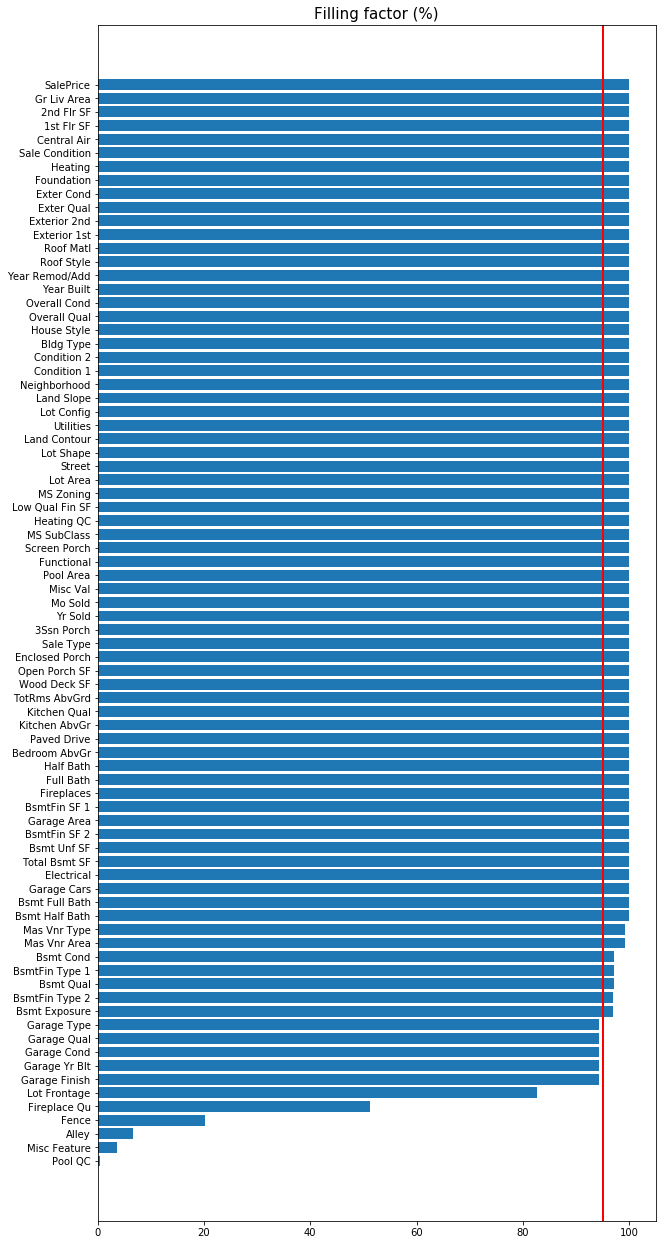

In [107]:
y_axis  = list(col_filling['filling_factor'])
x_axis  = [i for i in range(len(col_filling))]
x_label = list(col_filling['column_name'])
fig = plt.figure(figsize=(10, 22))
plt.yticks(x_axis, x_label)
plt.title('Filling factor (%)', fontsize = 15)
plt.axvline(x=95, linewidth=2, color = 'r')
plt.barh(x_axis, y_axis)
plt.show()

In [108]:
columns_to_remove = list(col_filling[col_filling['filling_factor'] < 95]['column_name'])
columns_to_remove

['Pool QC',
 'Misc Feature',
 'Alley',
 'Fence',
 'Fireplace Qu',
 'Lot Frontage',
 'Garage Finish',
 'Garage Yr Blt',
 'Garage Cond',
 'Garage Qual',
 'Garage Type']

In [109]:
data_df.drop(columns_to_remove, axis = 1, inplace = True)

Replacing Mas Vnr Type and Area

In [110]:
data_df['Mas Vnr Type'].fillna(value= 'None', inplace=True)
data_df['Mas Vnr Area'].fillna(value= 0, inplace=True)

Replacing Bas

In [111]:
bas_features = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

for col in bas_features:
    data_df[col].fillna(value= 'NA', inplace=True)

In [112]:
bas_features2 = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']

for col in bas_features:
    data_df[col].fillna(value= 0, inplace=True)

Dropping the remaining NA

In [113]:
data_df.dropna(inplace= True)

In [114]:
data_df.isnull().sum().sum()

0

In [100]:
data_df.shape

(2426, 69)

Checking for duplicates

In [115]:
data_df.loc[data_df.duplicated(),:]

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


Removing outliers

In [117]:
X_tr = data_df.drop('SalePrice', axis =1).values
y_tr = data_df.SalePrice.values

# Compute z-scores
z_scores = (y_tr - np.mean(y_tr)) / np.std(y_tr)

# Detect "extreme" data points
# 2 standard deviations away from the mean
idx = np.abs(z_scores) < 2

# Remove them
X_tr, y_tr = X_tr[idx], y_tr[idx]

In [118]:
print(X_tr.shape)
print(y_tr.shape)

(2314, 68)
(2314,)


# Encoding, feature engineering

In [116]:
data_df.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,60,RL,8795,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,4,2009,WD,Normal,236000
1,20,RL,10170,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,6,2006,WD,Normal,155000
2,160,RM,2001,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,1,2007,WD,Normal,75000
3,20,RL,10552,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,4,2010,WD,Normal,165500
4,190,RM,10120,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,...,264,0,0,0,0,1,2007,WD,Normal,122000


In [ ]:
# remove Order and PID

# MS SubClass and MS Zoning are both categorical but one is  encoded with numerical values
# and the other with short labels

# there are missing values

In [119]:
data_df.dtypes

MS SubClass          int64
MS Zoning           object
Lot Area             int64
Street              object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
                    ...   
Electrical          object
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
B

# Models

# Model evaluation

# Compute predictions